In [44]:
import cv2
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [32]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from matplotlib import pyplot as plt
import numpy as np
import os
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import random

In [4]:
import os
import shutil

combined_folder = 'combined_data'

# Create the combined_data directory if it doesn't exist
if not os.path.exists(combined_folder):
    os.makedirs(combined_folder)


In [5]:
train_folder = 'train'

for emotion_folder in os.listdir(train_folder):
    src_path = os.path.join(train_folder, emotion_folder)
    dest_path = os.path.join(combined_folder, emotion_folder)

    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Copy the contents of the source folder to the destination folder
    for file_name in os.listdir(src_path):
        src_file = os.path.join(src_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        shutil.copy(src_file, dest_file)


In [6]:
test_folder = 'test'

for emotion_folder in os.listdir(test_folder):
    src_path = os.path.join(test_folder, emotion_folder)
    dest_path = os.path.join(combined_folder, emotion_folder)

    # Create the destination directory if it doesn't exist
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Copy the contents of the source folder to the destination folder
    for file_name in os.listdir(src_path):
        src_file = os.path.join(src_path, file_name)
        dest_file = os.path.join(dest_path, file_name)
        shutil.copy(src_file, dest_file)


Apply SMOTE to the Combined Data:
Use SMOTE on the combined dataset to balance the classes.

In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
# Function to load images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

In [9]:
# Path to the combined dataset
combined_folder = 'combined_data'


In [52]:
# Function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [10]:
# Lists to store images and labels
images = []
labels = []


In [13]:
# Load images and labels from the combined dataset
for emotion_folder in os.listdir(combined_folder):
    emotion_path = os.path.join(combined_folder, emotion_folder)
    # Load images from the folder using your load_images_from_folder function
    emotion_images = load_images_from_folder(emotion_path)
    # Append images and corresponding labels to the lists
    images.extend(emotion_images)
    labels.extend([emotion_folder] * len(emotion_images))

In [16]:
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [20]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(-1, 48*48), y_train)


In [64]:
# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [25]:
# Reshape X_train and X_test to be suitable for CNN
X_train_reshaped = X_train.reshape(-1, 48, 48, 1).astype('float32') / 255.0
X_test_reshaped = X_test.reshape(-1, 48, 48, 1).astype('float32') / 255.0


In [28]:
# One-hot encode labels
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

In [39]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1), name='conv1'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name='conv2'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Adjust dropout rate

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name='conv3'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Adjust dropout rate

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name='conv4'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Adjust dropout rate

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Adjust dropout rate

model.add(Dense(7, activation='softmax'))

In [57]:
# Compile the model
history =model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print("Training history:", history)

Training history: None


In [58]:
# Check if history is None
if history is not None:
    # Plot training history
    plot_training_history(history)
else:
    print("Training failed. Check for errors during training.")

Training failed. Check for errors during training.


Epoch 1/2
718/718 [==============================] - 181s 252ms/step - loss: 1.3764 - accuracy: 0.4738 - val_loss: 1.2668 - val_accuracy: 0.5219
Epoch 2/2
718/718 [==============================] - 187s 260ms/step - loss: 1.3002 - accuracy: 0.5046 - val_loss: 1.2329 - val_accuracy: 0.5259


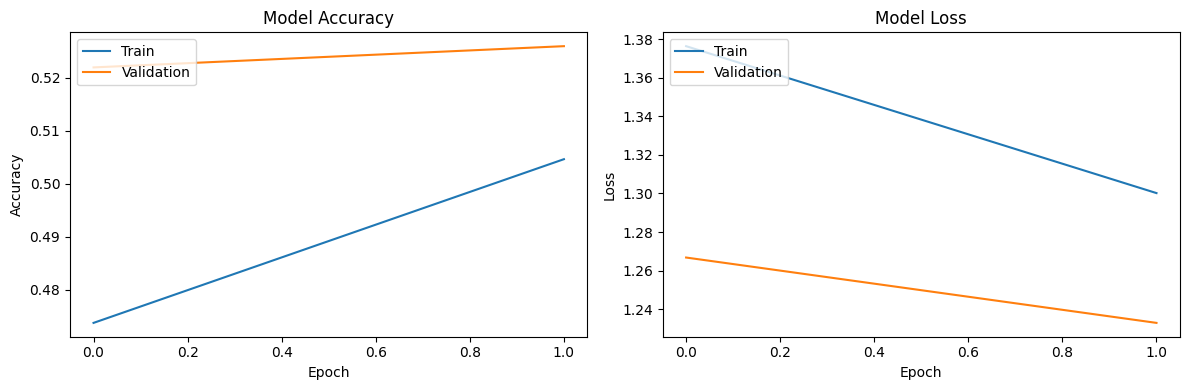

In [60]:
try:
    # Train the model
    history = model.fit(X_train_reshaped, y_train_onehot, epochs=8, batch_size=32, validation_split=0.2)
    
    if history is not None:
        # Plot training history
        plot_training_history(history)
    else:
        print("Training history is None. Check for errors during training.")
except Exception as e:
    print("An error occurred during training:", str(e))


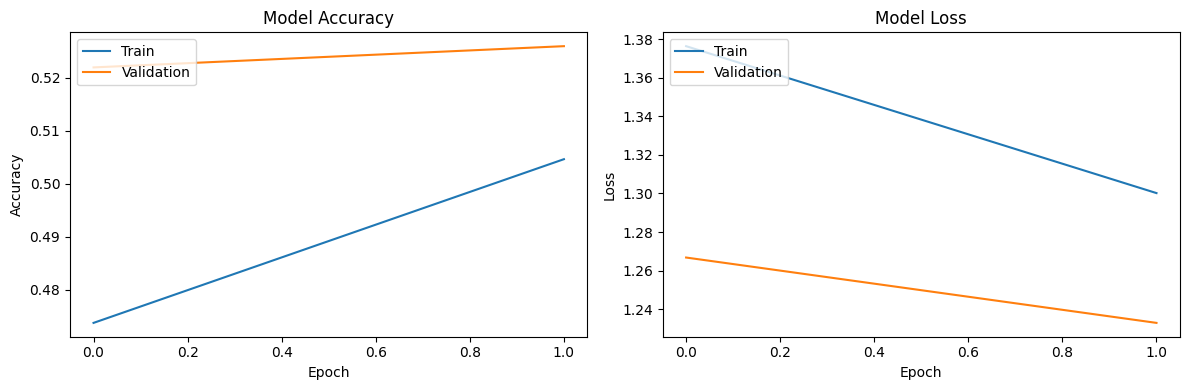

In [61]:
# Plot training history
plot_training_history(history)


In [41]:
# Train the model
model.fit(X_train_reshaped, y_train_onehot, epochs=2, batch_size=32, validation_split=0.2)

Epoch 1/2
718/718 [==============================] - 180s 249ms/step - loss: 1.7432 - accuracy: 0.2927 - val_loss: 1.5784 - val_accuracy: 0.3800
Epoch 2/2
718/718 [==============================] - 169s 235ms/step - loss: 1.5312 - accuracy: 0.4041 - val_loss: 1.3706 - val_accuracy: 0.4728


In [42]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test_onehot)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

225/225 [==============================] - 11s 47ms/step - loss: 1.4003 - accuracy: 0.4543
Test Accuracy: 45.43%


In [43]:
# Save the entire model to a HDF5 file
model.save('combined_model.h5')

In [45]:
# Evaluate the model on the test set
y_pred_onehot = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_onehot, axis=1)
y_test_labels = np.argmax(y_test_onehot, axis=1)

225/225 [==============================] - 8s 35ms/step


In [46]:
# Accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.3951


In [47]:
# Classification Report
print('Classification Report:')
print(classification_report(y_test_labels, y_pred_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.26      0.46      0.33      1003
           1       0.00      0.00      0.00       113
           2       0.23      0.17      0.19      1034
           3       0.49      0.81      0.61      1754
           4       0.41      0.15      0.22      1235
           5       0.40      0.06      0.10      1250
           6       0.45      0.66      0.53       789

    accuracy                           0.40      7178
   macro avg       0.32      0.33      0.29      7178
weighted avg       0.38      0.40      0.34      7178



C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[ 460    0   85  286   59   23   90]
 [  55    0   11   27    8    1   11]
 [ 284    0  172  253   74   31  220]
 [ 163    0   57 1427   24   17   66]
 [ 314    0  162  380  183   34  162]
 [ 400    0  187  403   96   74   90]
 [  82    0   65  112    5    5  520]]


In [49]:
from keras.models import load_model

# Load the model
loaded_model = load_model('combined_model.h5')

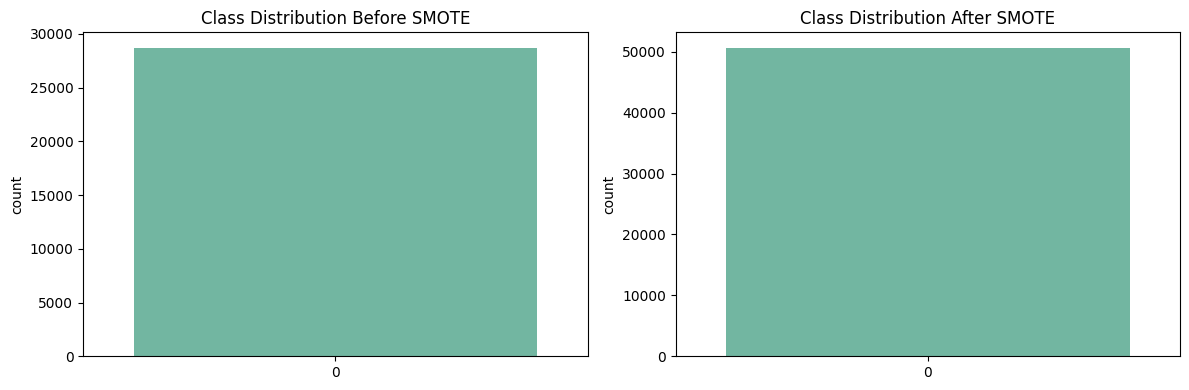

In [65]:
# Plot class distribution before and after SMOTE
# Encode labels for y_train_resampled using label_encoder
y_train_resampled_encoded = label_encoder.transform(y_train_resampled)

# Plot class distribution before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(y_train_encoded, palette='Set2')
plt.title('Class Distribution Before SMOTE')

plt.subplot(1, 2, 2)
sns.countplot(y_train_resampled_encoded, palette='Set2')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()
